In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

Kita akan mempelajari prinsp-prinsip machine learning menggunakan dataset titanic untuk memprediksi apakah seseorang selamat atau tidak menggunakan algoritma KNN, dibawah merupakan metadata/nomenklatur mengenai dataset titanic

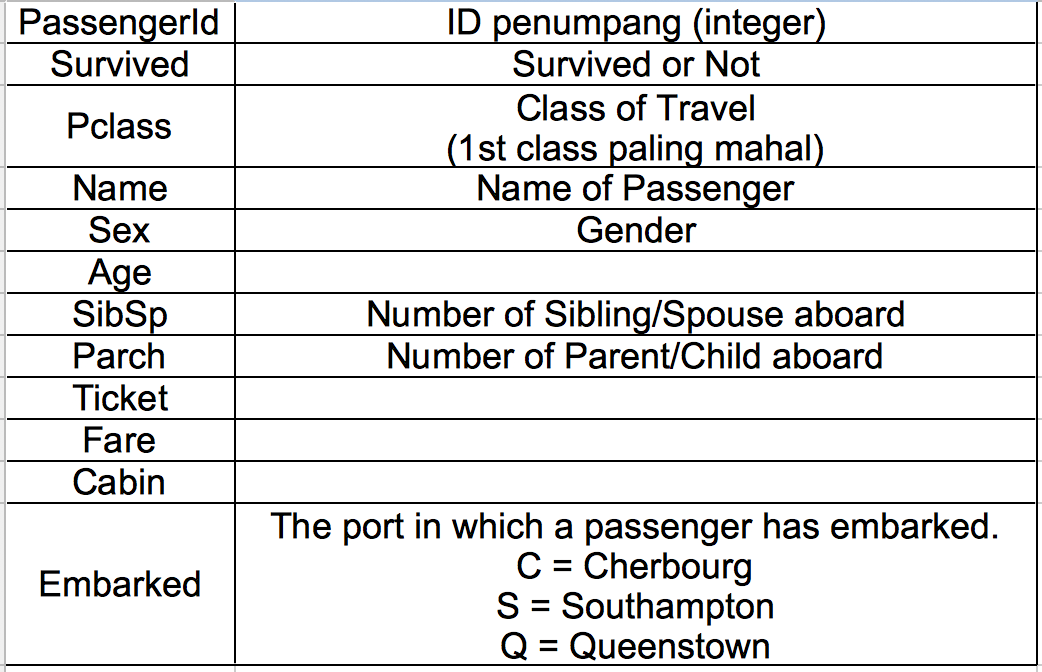

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId") 
df

# membuat dataframe dan menjadikan kolom PassangerId untuk dijadikan index

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Feature Selection

Feature Selection adalah pemilihan feature atau kolom variabel input untuk digunakan dalam pemodelan

agar tidak terlalu kompleks, kita akan drop feature/kolom input yang sekiranya tidak memberikan pengaruh besar dalam pemodelan untuk prediksi kita, biasanya kita menggunakan domain knowledge untuk menentukan kolom apa yang harus di drop, biasanya teknik ini digunakan untuk membuat model yang simple untuk dijadikan benchmark agar selanjutnya dijadikan score base untuk pemodelan yang lebih advanced karena sangat disarankan melakukan pemodelan dari yang sederhana terlebih dahulu baru beranjak ke yang lebih kompleks

In [4]:
df.drop(columns=["Name", "Ticket"], inplace=True)

# disininkita drop kolom nama dan tiket karena dianggap tidak memiliki pengaruh terhadapa pemodelan

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


## Quick EDA

In [6]:
from jcopml.plot import plot_missing_value

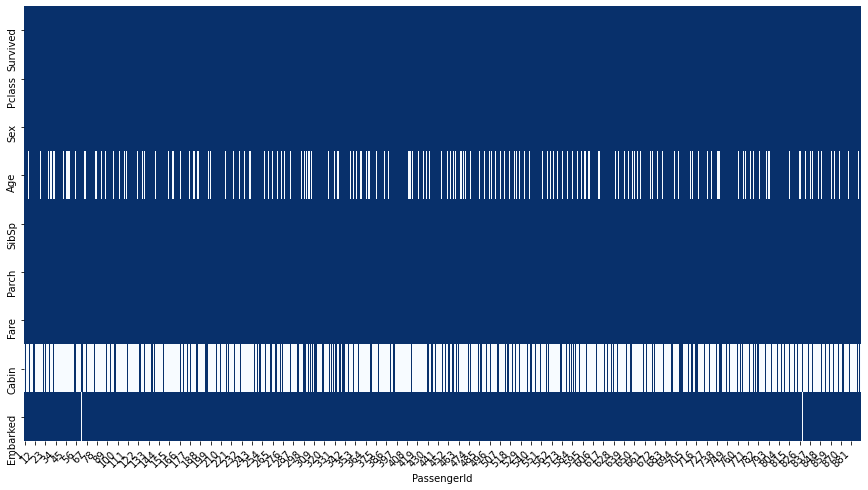

In [7]:
plot_missing_value(df)

# melihat missing value

Banyak datya yang hilang di kolom age dan cabin, dan terdapat sangat sedikit data yang hiolang di kolom Embarked  
 
Kita akan drop kolom age dan cabin, lalu melakukan imputasi ke data hiolang di kolom Embarked dengan value yang paling banuak frekuensinya (modus)

In [8]:
df.drop(columns=["Age", "Cabin"], inplace=True)

# drop kolom age dan cabin

In [11]:
df.Embarked.value_counts()

# melihat daerah mana yang paling banyak di kolom Embarked untuk digunakan dalam penentuan data imputasi

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df.fillna({"Embarked":"S"}, inplace=True)

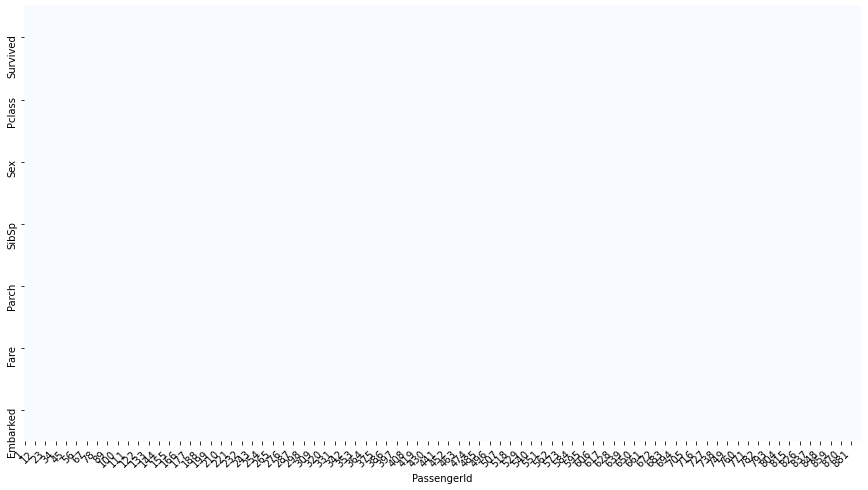

In [19]:
plot_missing_value(df);

# sudah tidak ada missing value

## Data Preparation

dataset akan dipecah menjadi 2, x dan y  
x adalah kolom-kolom data input feature dan y adalah kolom target yang inign kita prediksi

In [21]:
x = df.drop(columns="Survived") # kolom selain kolom target
y = df.Survived

Mengubah data kategorikal menjadi numerik menggunakan one-hot encoding

In [22]:
x = pd.get_dummies(x, columns=["Pclass", "Sex", "Embarked"])

In [23]:
x

# kolom input feature yang sudah di encoding

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,13.0000,0,1,0,0,1,0,0,1
888,0,0,30.0000,1,0,0,1,0,0,0,1
889,1,2,23.4500,0,0,1,1,0,0,0,1


In [24]:
y

# kolom target

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

## Pemodelan

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)   # feature di train

KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.score(x,y)

0.8933782267115601

## Data Splitting

Walaupun hasil score pemodelan kita diatas bagus, namun sebenarnya haol tersebut keliru dikarenakan pemodelan seperti itu menghasilkan data leakage. jadi scorenya sangat bias karena menggunakan semua data. seharusnya kita membagi data lagi menjadi data train dan data test.

data train digunakan untuk melatih model kita untuk digunakan dalam prediksi, data test digunakan untuk melihat apakah pemodelan kita bernilai bagus atau tidak (validasi). Konsep ini dinamakan Data Splitting

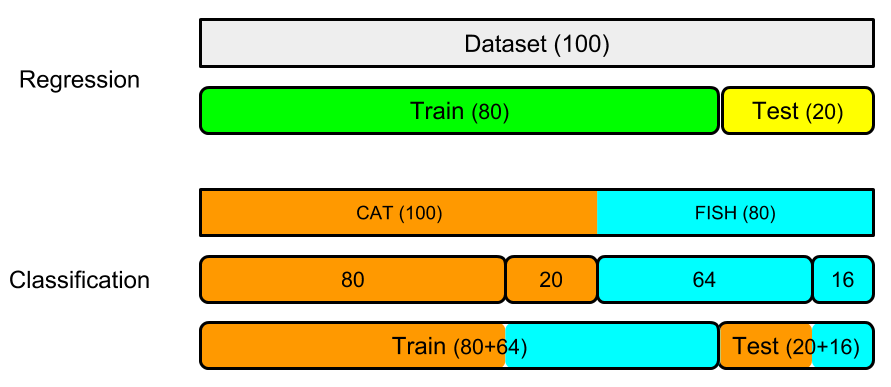

In [31]:
illustration.train_test_split

untuk regresi kita bisa menggunakan data split biasa, data diacak kemudian dibagi berdasarkan rasio test dan train yang kita inginkan. 

untuk klasifikasi kita menggunakan stratify shuffle split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = df.drop(columns="Survived") # kolom selain kolom target
y = df.Survived

x = pd.get_dummies(x, columns=["Pclass", "Sex", "Embarked"])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# melihat ukuran data train dan data test
#

((712, 11), (179, 11), (712,), (179,))

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)   

KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.score(x_test,y_test)

0.7039106145251397

In [42]:
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.9157303370786517, 0.7039106145251397)

terlihat hasil data train dan hasil data test sangat timpang, hal itu menandakan terdapat overfit pada pemodelan kita. hasil yang baik apabila hasil train dan test tidak jauh berbeda|

## K-Fold Cross Validation

dalam scoring data validation yang lebih advanced, data splitting saja tidak cukup, karena data spliting hanya dilakukan sekali, walaupun diacak terlebih dahulu, masih memungkinkan kejadian dimana data train banyak data yang relatif mudah untuk ditrain atau sebaliknya, banyak data yang susah di train, oleh karena itu perlu cross validation berulang seperti pada k-fold cross validation

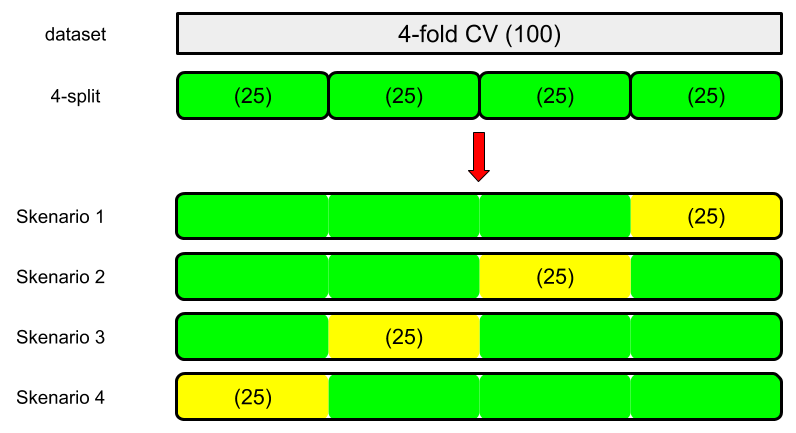

In [43]:
illustration.kfold_cv

data akan di shufle seperti biasa, lalu akan dibagi sebanyak-k fold, lalu akan secara bertahap data test akan berubah sebanyak k, di gambar diatas di fold sebanyak 4 kali, setelah itu baru keluar hasil cv score kita dari rata2 score masing-masing fold. cara ini mengurangi efek beruntung atau sial saat melakukan splitting biasa

In [44]:
from sklearn.model_selection import cross_val_score

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, x, y, cv=5) # 5 fold CV

# tidak menggunakan data test dan data train karena nanti akan di-split ditentukan otomatis
# kita hanya menentukan jumlah fold

array([0.62569832, 0.65168539, 0.83146067, 0.7752809 , 0.74719101])

In [70]:
cross_val_score(knn, x, y, cv=5).mean()

#score rata-rata dari CV

0.7262632603100874

hasil ini lebih baik daripada melakukan data spliting biasa

- Data Splitting = 0.7039106145251397
- K-Fold CV (using 5 fold) = 0.7262632603100874

dalam menentukan k-fold, jangan terlalu banyak dan jangan terlalu sedikit, bila terlalu banyak nantinya data test terlalu sedikit sehingga dalam pemodelan bisa membuat terlalu sensitif, jangan terlalu sedikit juga agar data train cukup untuk melakukan pemodelan, secara basic k = 3 - 5 sudah cukup

kita bisa melakukan peningkatan model untuk mendapatkan hasil validasi yang lebih baik, beberapa diantaranaya adalah

## Improvement melalui data (Feature Engineering)

Pada dasarnya terdapat banyak sekal;i metode feature wengineering, dan sangat bergantung dengan kondisi datanya.  
berikut beberapa contoh feature engineering:

- **Feature Scalling**
    - MinMax
    - Standard
    - Robust
- **Feature Transformation**
    - logaritmik
    - pangkat
    - trigonometrik
- **Typpe Convertion**
    - categorical to numerical (encoding & hashing)
    - numerical to categorical (binning)
- Feature Selection
    - Dimensionality reduction
    - Feature importance and selection
- Text Data
    - Flattening
    - Filtering
    - Chunking

### Contoh improvement melalui data : Feature Scalling

In [52]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

pada beberapa algoritma machine learning yang meanfaatkan distance/jarak, diperlukan scalling untuk menyamakan skala pada kolom-kolom yang berbeda. contoh diatas data gaji memiliki range data jutaan sedangkan data n_anak memiliki range hanya satuan, terlihat sangat timpang antara jutaan dan satuan, oleh karena itu diperlukan scalling agar jarak value antar kolom tidak terlalu jauh dan memudahkan algoritma dan waktu proses komputing menjadi lebih cepat.

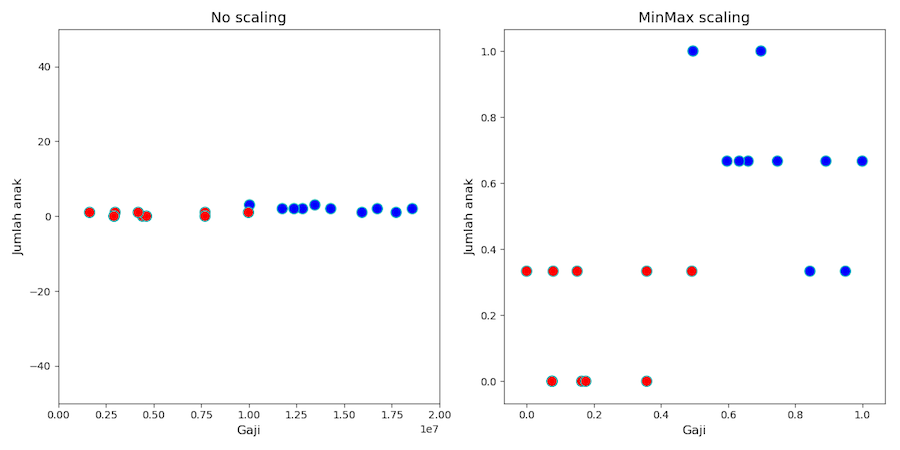

In [58]:
illustration.knn_scaling

pada gambar diatas setelah dilakukan scalling jarak antar titik lebih jelas dan tidak overlapping sehingga memudahkan algoritma machine learning

<img src="MinMax.PNG"/>

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train) # data test tidak difit karena nanti akan data leakeage

MinMaxScaler()

In [64]:
scaler.data_min_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
scaler.data_max_

array([  8.    ,   6.    , 512.3292,   1.    ,   1.    ,   1.    ,
         1.    ,   1.    ,   1.    ,   1.    ,   1.    ])

In [66]:
x_train_scaled = scaler.transform(x_train) # x old ditransform jadi x new
x_test_scaled = scaler.transform(x_test) # x old ditransform jadi x new

In [67]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
knn.score(x_train_scaled, y_train), knn.score(x_test_scaled, y_test)

(0.9157303370786517, 0.7150837988826816)

improve 1 persen dibandingkan data splitting tanpa saclling

### Contoh improvement melalui model : Parameter tning

### Tuning n_neighbor tanpa scaling

In [78]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

In [95]:
train_score, test_score, 

([0.9157303370786517,
  0.8623595505617978,
  0.8455056179775281,
  0.8286516853932584,
  0.800561797752809,
  0.7851123595505618,
  0.7851123595505618,
  0.7808988764044944,
  0.7794943820224719,
  0.7654494382022472,
  0.7528089887640449,
  0.7528089887640449,
  0.7429775280898876,
  0.7401685393258427,
  0.7485955056179775,
  0.7443820224719101,
  0.7429775280898876,
  0.7485955056179775,
  0.7471910112359551,
  0.7528089887640449,
  0.7345505617977528,
  0.7303370786516854,
  0.7191011235955056,
  0.7247191011235955,
  0.7134831460674157],
 [0.7039106145251397,
  0.7541899441340782,
  0.7206703910614525,
  0.7150837988826816,
  0.7318435754189944,
  0.7094972067039106,
  0.7094972067039106,
  0.7039106145251397,
  0.7094972067039106,
  0.7206703910614525,
  0.7039106145251397,
  0.7039106145251397,
  0.6983240223463687,
  0.6983240223463687,
  0.6927374301675978,
  0.7039106145251397,
  0.6703910614525139,
  0.6759776536312849,
  0.659217877094972,
  0.6703910614525139,
  0.6256983

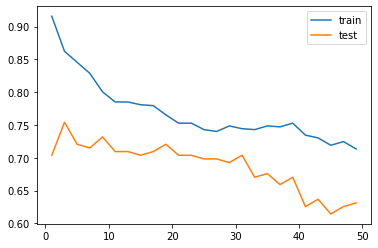

In [80]:
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

In [83]:
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7541899441340782
n_neighbor: 3


maximum test score adalah 0.7541899441340782 dengan n_neighbor = 3

### Tuning n_neighbor dengan scaling

Max test score: 0.7988826815642458
n_neighbor: 29


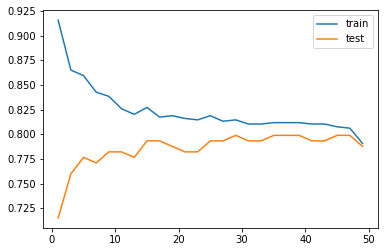

In [96]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    
    train_score.append(knn.score(x_train_scaled, y_train))
    test_score.append(knn.score(x_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")c
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

setelah dilakukan scaling menggunakan k dr 1 sampai 49 kelipatan 2, data test mengalami peningkatan dan n terbaik adalah 29 dengan score 0.7988826815642458

### Tuning n_neighbor dengan weight by distance

Max test score: 0.7988826815642458
n_neighbor: 49


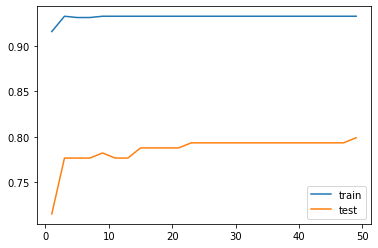

In [98]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(x_train_scaled, y_train)
    
    train_score.append(knn.score(x_train_scaled, y_train))
    test_score.append(knn.score(x_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

hasil scorenya tidak berbeda jauh setealh discale dan setelah di beri pembobotan

### pakai manhatan distance

Max test score: 0.7932960893854749
n_neighbor: 23


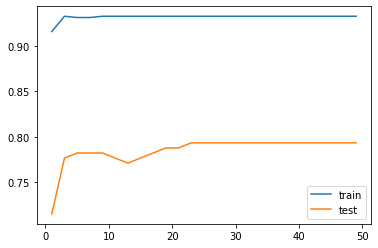

In [99]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", p=1)
    knn.fit(x_train_scaled, y_train)
    
    train_score.append(knn.score(x_train_scaled, y_train))
    test_score.append(knn.score(x_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")